## Tugas 1: Single Layer Perceptron | PMML

Nama: Frederik Baptista Sakspari

NIM: 24/550780/PPA/06957

#### Fungsi Yang Dibutuhkan:

- Fungsi Init
- Fungsi Dot Product
- Fungsi Aktivasi Sigmoid
- Error Function
- Update Bias and Weight

#### Fitur Tambahan:
- history acc untuk train dan validation set
- history loss untuk train dan validation set
- plotting/visualisasi

#### Data Loading and Visualization

In [8]:
import pandas as pd

column_names = ['x1', 'x2', 'x3', 'x4', 'target']
iris_data = pd.read_csv('./Data.csv', header=None, names=column_names)

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   x3      100 non-null    float64
 3   x4      100 non-null    float64
 4   target  100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


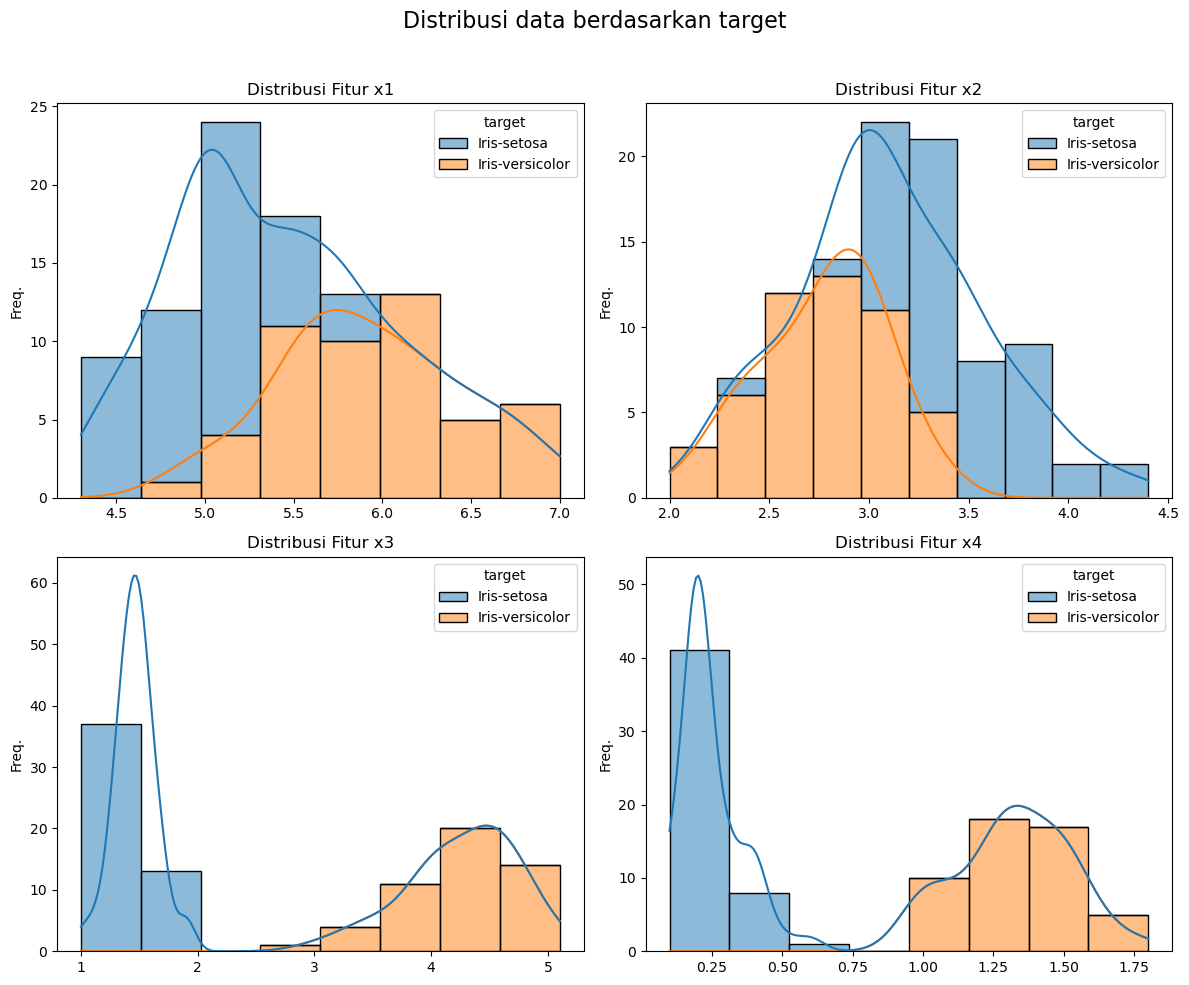

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribusi data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribusi data berdasarkan target', fontsize=16)

axes = axes.flatten()
features = ['x1', 'x2', 'x3', 'x4']

for i, feature in enumerate(features):
    sns.histplot(data=iris_data, x=feature, hue='target', ax=axes[i], kde=True, multiple="stack")
    axes[i].set_title(f'Distribusi Fitur {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Freq.')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('distribusi_data.png')
plt.show()

#### Insight

dari distribusi fitur terlihat bahwa fitur-fitur dari dataset ini punya separability yang baik. ada kemungkinan kita bisa mendapatkan hasil klasifikasi yang baik dari data ini.

#### Single Layer Perceptron

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class SLP:
    """Single Layer Perceptron dengan fungsi aktivasi sigmoid | PMML """
    
    def __init__(self, input_size=4, learning_rate=0.1, weights=None, bias=None):
        """Ukuran input disesuaikan dengan jumlah fitur dari data"""
        self.input_size = input_size
        self.learning_rate = learning_rate
        if weights is None:
            self.weights = self._inisialisasi_bobot(input_size)
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = np.random.uniform(-0.5, 0.5)
        else:
            self.bias = bias

    
    def _inisialisasi_bobot(self, input_size):
        """Inisialisasi semua bobot menjadi 0.5"""
        return np.random.uniform(-0.5, 0.5, input_size)

    
    def dot_product(self, x):
        """Hitung z = X @ w.T + b (dot product)"""
        return np.dot(x, self.weights.T) + self.bias
    
    def sigmoid(self, z):
        """Tungsi aktivasi sigmoid"""
        return 1 / (1 + np.exp(-z))
    
    def _prediksi_biner(self, y_pred):
        """Konversi output sigmoid ke prediksi biner"""
        return (y_pred >= 0.5).astype(int)
    
    def _hitung_gradien(self, x_i, y_pred, y_i):
        """Hitung gradien untuk bobot dan bias"""
        dw = x_i * (2 * (y_pred - y_i) * y_pred * (1 - y_pred))
        db = (2 * (y_pred - y_i) * y_pred * (1 - y_pred))
        return dw, db
    
    def _update_bobot(self, dw, db):
        """Update bobot dan bias menggunakan gradient descent"""
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    def predict(self, X):
        """Buat prediksi pada data input"""
        predictions = []
        for i in range(len(X)):
            z = self.dot_product(X[i])
            y_pred = self.sigmoid(z)
            pred = self._prediksi_biner(y_pred)
            predictions.append(pred)
        return np.array(predictions)
    
    def probabilitas(self, X):
        """Kembalikan probabilitas sigmoid untuk data input"""
        probabilities = []
        for i in range(len(X)):
            z = self.dot_product(X[i])
            y_pred = self.sigmoid(z)
            probabilities.append(y_pred)
        return np.array(probabilities)
    
    def error(self, y_pred, y_true):
        """Hitung error antara prediksi dan nilai sebenarnya"""
        return y_pred - y_true
    
    def accuracy(self, predictions, y_true):
        """Hitung akurasi dari prediksi"""
        return (predictions == y_true).mean() * 100
    
    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=5):
        """
        train SLP
        
        Args:
            X_train: Data input pelatihan
            y_train: Label target pelatihan
            X_val: Data input validasi
            y_val: Label target validasi
            epochs: Jumlah epoch pelatihan
            
        Returns:
            dict: Riwayat pelatihan yang berisi metrik
        """
        self.train_error = []
        self.val_error = []
        self.train_loss = []
        self.val_loss = []
        self.train_accuracy = []
        self.val_accuracy = []
        
        # Pelatihan
        for epoch_num in range(epochs):
            correct_preds = 0
            train_error = 0
            train_loss = 0
            
            # Latih
            for i in range(len(X_train)):
                # Lakukan Forward Pass
                z = self.dot_product(X_train[i])
                
                # Sigmoid
                y_pred = self.sigmoid(z)
                
                # Prediksi
                Pred = self._prediksi_biner(y_pred)
                
                # Lacak akurasi
                if Pred == y_train[i]:
                    correct_preds += 1
                
                # Error
                error = self.error(y_pred, y_train[i])
                train_error += error
                # Sum Squared Error
                train_loss += error ** 2
                
                # Lakukan gradient descent
                dw, db = self._hitung_gradien(X_train[i], y_pred, y_train[i])
                
                # Update bobot
                self._update_bobot(dw, db)
            
            # Statistik pelatihan
            train_accuracy = correct_preds / len(X_train) * 100
            self.train_error.append(train_error)
            self.train_loss.append(train_loss)
            self.train_accuracy.append(train_accuracy)
            
            if X_val is not None and y_val is not None:
                # Validasi dengan bobot yang telah diupdate
                val_preds = []
                val_error=0
                val_loss = 0
                for i in range(len(X_val)):
                    z = self.dot_product(X_val[i])
                    y_pred = self.sigmoid(z)
                    Pred = self._prediksi_biner(y_pred)
                    val_preds.append(Pred)
                    error = self.error(y_pred, y_val[i])
                    val_error += error
                    val_loss += error**2
                    
                # Statistik Validasi
                val_acc = self.accuracy(np.array(val_preds), y_val)
                self.val_error.append(val_error)
                self.val_loss.append(val_loss)
                self.val_accuracy.append(val_acc)
            
                # Cetak laporan epoch
                print(f"Epoch {epoch_num + 1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | Val Loss: {val_loss:.4f},  Val Acc: {val_acc:.2f}%")
            else:
                print(f"Epoch {epoch_num + 1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%")
        return {
            'train_loss': self.train_loss,
            'val_loss': self.val_loss,
            'train_accuracy': self.train_accuracy,
            'val_accuracy': self.val_accuracy,
            'bobot_akhir': self.weights.copy(),
            'bias_akhir': self.bias
        }
    
    def plot_error(self, epochs):
        """Plot loss pelatihan dan validasi"""
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, epochs + 1), self.train_error, marker='o', label="Train Error")
        plt.plot(range(1, epochs + 1), self.val_error, marker='o', label="Val Error")
        plt.xlabel("Epoch")
        plt.ylabel("Error")
        plt.title("Error Per Epoch")
        plt.xticks(range(1, epochs + 1))
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def plot_loss(self, epochs):
        """Plot loss pelatihan dan validasi"""
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, epochs + 1), self.train_loss, marker='o', label="Train Loss")
        plt.plot(range(1, epochs + 1), self.val_loss, marker='o', label="Val Loss")
        plt.xlabel("Epoch")
        plt.ylabel("SSE")
        plt.title("Loss Per Epoch")
        plt.xticks(range(1, epochs + 1))
        plt.legend()
        plt.tight_layout()
        plt.show()

    def plot_accuracy(self, epochs):
        """Plot akurasi pelatihan dan validasi"""
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, epochs + 1), self.train_accuracy, marker='o', label="Train Acc.")
        plt.plot(range(1, epochs + 1), self.val_accuracy, marker='o', label="Val Acc.")
        plt.xlabel("Epoch")
        plt.ylabel("Akurasi (%)")
        plt.title("Akurasi Per Epoch")
        plt.xticks(range(1, epochs + 1))
        plt.legend()
        plt.tight_layout()
        plt.show()
    

#### Prepare data training dan validasi

In [11]:
iris_data

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [12]:
# mapping target into binary class
target_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1
}

iris_data['target_binary'] = iris_data['target'].map(target_mapping)
iris_data


,x1,x2,x3,x4,target,target_binary
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,1
96,5.7,2.9,4.2,1.3,Iris-versicolor,1
97,6.2,2.9,4.3,1.3,Iris-versicolor,1
98,5.1,2.5,3.0,1.1,Iris-versicolor,1


In [13]:
# extract target and features
X = iris_data[['x1', 'x2', 'x3', 'x4']].values
y = iris_data['target_binary'].values

In [14]:
# define split function
def train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Manually split data into train and test sets
    
    Args:
        X (numpy.ndarray): Features
        y (numpy.ndarray): Target
        test_size (float): Proportion for test set (0.0 to 1.0)
        random_state (int): Random seed for reproducibility
    
    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Get total number of samples
    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)
    n_train = n_samples - n_test
    
    # Create random indices
    indices = np.random.permutation(n_samples)
    
    # Split indices
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]
    
    # Split data
    X_train = X[train_indices]
    X_test = X[test_indices] 
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Perform split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)


In [15]:
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")

Training set: 80 samples (80.0%)
Validation set: 20 samples (20.0%)


In [16]:
# define variable sesuai spreadsheet
lr=.1
weights = np.array([.5, .5, .5, .5])
bias = .5
input_size = 4
n_epoch = 5

model = SLP(input_size=input_size, learning_rate=lr, weights=weights, bias=bias)


In [17]:
model.fit(X_train, y_train, X_val, y_val, epochs=n_epoch)

Epoch 1/5 | Train Loss: 37.7970, Train Acc: 48.75% | Val Loss: 1.7626,  Val Acc: 95.00%
Epoch 2/5 | Train Loss: 3.7172, Train Acc: 97.50% | Val Loss: 0.5164,  Val Acc: 100.00%
Epoch 3/5 | Train Loss: 1.3494, Train Acc: 100.00% | Val Loss: 0.3001,  Val Acc: 100.00%
Epoch 4/5 | Train Loss: 0.8600, Train Acc: 100.00% | Val Loss: 0.2036,  Val Acc: 100.00%
Epoch 5/5 | Train Loss: 0.6370, Train Acc: 100.00% | Val Loss: 0.1505,  Val Acc: 100.00%


{'train_loss': [37.79696767194264,
  3.7172167738483464,
  1.3493903013866213,
  0.8599712651900125,
  0.6370078925398867],
 'val_loss': [1.7626138899913657,
  0.5163779713590907,
  0.3001080029874016,
  0.2036103065189846,
  0.15052646611930362],
 'train_accuracy': [48.75, 97.5, 100.0, 100.0, 100.0],
 'val_accuracy': [95.0, 100.0, 100.0, 100.0, 100.0],
 'bobot_akhir': array([-0.42166238, -0.79411295,  1.52826519,  0.98622719]),
 'bias_akhir': 0.21887110911625593}

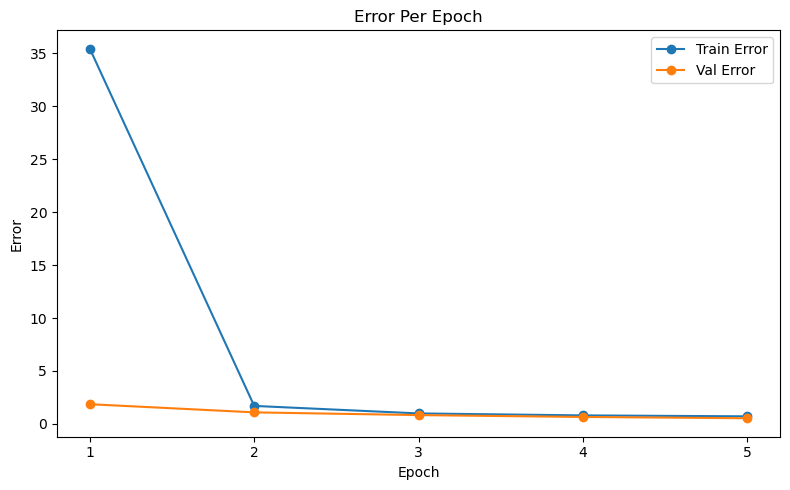

In [18]:
model.plot_error(epochs=5)

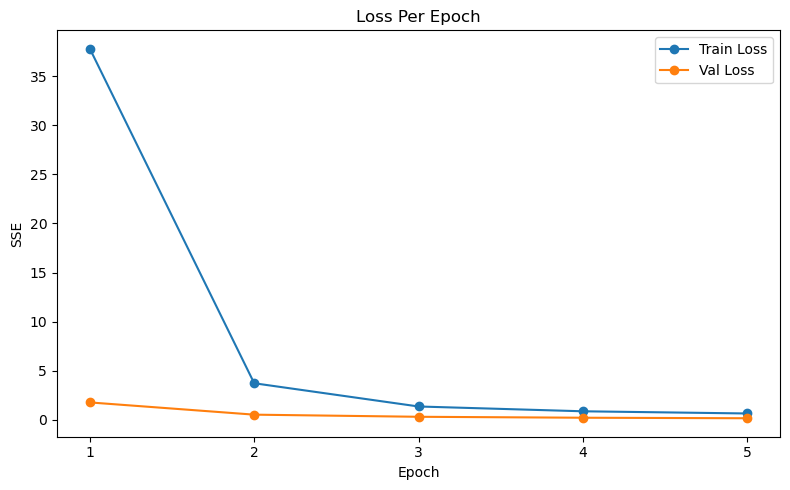

In [19]:
model.plot_loss(epochs=5)

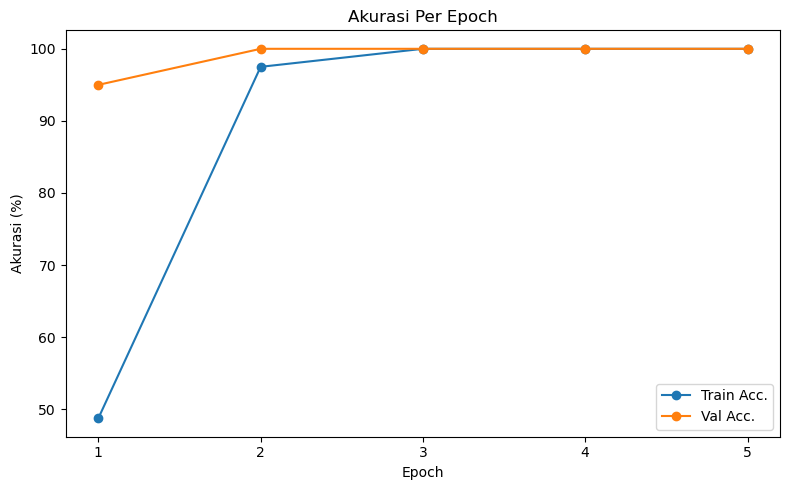

In [20]:
model.plot_accuracy(epochs=5)